In [34]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import multinomial
import matplotlib.pyplot as plt

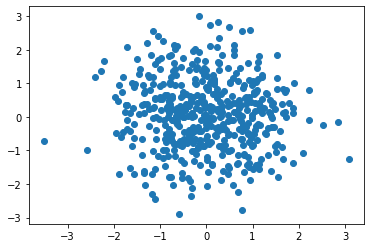

In [29]:
samples = multivariate_normal(mean=[0,0],cov=1).rvs(500)
plt.scatter(samples[:,0],samples[:,1])

In [30]:
axes = np.zeros([3, 2])
frac = np.linspace(0,3,3)

proj = np.zeros([500,3])

for i in range(3):
    axes[i,:] = [np.cos((np.pi * frac[i]) / 6), np.sin((np.pi * frac[i]) / 6)]
    proj[:,i] = samples @ axes[i,:].T

In [31]:
#so lets find the first and second moments of the projected data
m1 = np.sum(proj,axis=0) / 500
m2 = np.sum(proj **2, axis=0) / 500

cov = m2 - m1 **2

In [32]:
mu = np.linalg.inv(axes.T @ axes) @ axes.T @ m1

In [33]:
A = np.zeros([3,3])
A[:,0] = axes[:,0] ** 2
A[:,1] = axes[:,0] * axes[:,1]
A[:,2] = axes[:,1] ** 2


#solve for sigma, theoretically could use projection of this onto cone of semipos def. from old code
sigma = np.linalg.inv(A) @ cov
sigma

array([ 0.93409234, -0.10547053,  1.08253757])

In [55]:
#now lets do the more complex case of a multicomponent mixture

rng = np.random.default_rng()
mix_freq = rng.multinomial(500, [0.3,0.5,0.2])


samp1 = multivariate_normal(mean=[0,0],cov=1).rvs(mix_freq[0])
samp2 = multivariate_normal(mean=[3,1],cov=[[0.5,0.1],[0.1,0.4]]).rvs(mix_freq[1])
samp3 = multivariate_normal(mean=[1.5,-2.5],cov=[[1.2,0.2],[0.2,2.1]]).rvs(mix_freq[2])
    
samples = np.concatenate([samp1,samp2,samp3])

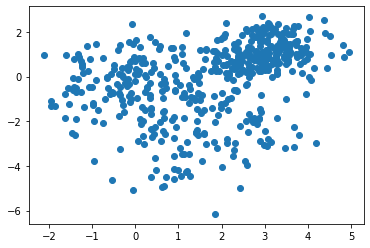

In [56]:
plt.scatter(samples[:,0],samples[:,1])

In [61]:
S = 20

axes = np.zeros([S, 2])
frac = np.linspace(0,S,S)

proj = np.zeros([500,S])
A = np.zeros([S,6])

for i in range(S):
    axes[i,:] = [np.cos((np.pi * frac[i]) / 2*S), np.sin((np.pi * frac[i]) / 2*S)]
    proj[:,i] = samples @ axes[i,:].T
    A[i,:3] = axes[i,0]
    A[i,3:] = axes[i,1]
    
m1 = np.sum(proj,axis=0) / 500
m2 = np.sum(proj **2, axis=0) / 500

In [62]:
w_mu = np.linalg.inv(A.T @ A) @ A.T @ m1

LinAlgError: Singular matrix

In [63]:
A.T @A

array([[1.05000000e+01, 1.05000000e+01, 1.05000000e+01, 8.92619312e-14,
        8.91037241e-14, 8.91037241e-14],
       [1.05000000e+01, 1.05000000e+01, 1.05000000e+01, 8.92619312e-14,
        8.91037241e-14, 8.91037241e-14],
       [1.05000000e+01, 1.05000000e+01, 1.05000000e+01, 8.92619312e-14,
        8.91037241e-14, 8.91037241e-14],
       [8.92619312e-14, 8.92619312e-14, 8.92619312e-14, 9.50000000e+00,
        9.50000000e+00, 9.50000000e+00],
       [8.91037241e-14, 8.91037241e-14, 8.91037241e-14, 9.50000000e+00,
        9.50000000e+00, 9.50000000e+00],
       [8.91037241e-14, 8.91037241e-14, 8.91037241e-14, 9.50000000e+00,
        9.50000000e+00, 9.50000000e+00]])